In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv

In [2]:
data = pd.read_csv('mxmh_survey_results.csv')
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Data cleaning and pre-processing

In [3]:
data.shape

(736, 33)

In [4]:
data = data.drop(columns=['Timestamp','Permissions'])

In [5]:
data.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [6]:
data = data.dropna(subset=['Age','Primary streaming service','Composer','While working','Instrumentalist','Foreign languages','Music effects'])

In [7]:
data.shape

(718, 31)

In [8]:
data.isna().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             102
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [9]:
data['BPM'].head()

2    132.0
3     84.0
4    107.0
5     86.0
6     66.0
Name: BPM, dtype: float64

In [10]:
mean_bpm = data['BPM'].mean()
print("The mean BPM is: ", mean_bpm)

The mean BPM is:  1623500.0016233767


#### Assessing the null values for each genre

In [11]:
data['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [12]:
bpm_jazz = data.loc[data['Fav genre']== 'Jazz',['Fav genre','BPM']]

In [13]:
bpm_jazz_mean = bpm_jazz['BPM'].mean()

In [14]:
print("The average BPM for Jazz music lovers is...", bpm_jazz_mean)

The average BPM for Jazz music lovers is... 124.47368421052632


In [15]:
bpm_jazz.head()

,Fav genre,BPM
3,Jazz,84.0
5,Jazz,86.0
14,Jazz,148.0
75,Jazz,167.0
81,Jazz,118.0


In [16]:
bpm_jazz.describe()

,BPM
count,19.000000
mean,124.473684
std,36.925403
min,81.000000
25%,91.500000
50%,120.000000
75%,144.000000
max,200.000000


In [17]:
bpm_jazz['BPM'].isna().sum()

1

(array([5., 2., 1., 3., 3., 2., 0., 1., 0., 2.]),
 array([ 81. ,  92.9, 104.8, 116.7, 128.6, 140.5, 152.4, 164.3, 176.2,
        188.1, 200. ]),
 <BarContainer object of 10 artists>)

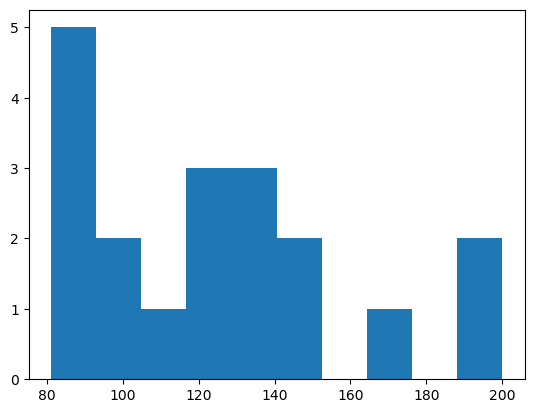

In [18]:
plt.hist(bpm_jazz['BPM'])

In [19]:
jazzbpm_std = bpm_jazz['BPM'].std()
print('The standard deviation is...',jazzbpm_std)

The standard deviation is... 36.92540291069224


In [20]:
bpm_jazz['bpm_jazz_z'] = 0
for i in bpm_jazz['BPM']:
    z = ((i-bpm_jazz_mean)/jazzbpm_std)
    idx = bpm_jazz[bpm_jazz['BPM'] ==i].index
    bpm_jazz.loc[idx, "bpm_jazz_z"] =z

In [21]:
bpm_jazz['bpm_jazz_z'].head()

3    -1.096093
5    -1.041930
14    0.637131
75    1.151682
81   -0.175318
Name: bpm_jazz_z, dtype: float64

In [22]:
bpm_jazz['isOutlierBPM'] = 0

In [23]:
for z in bpm_jazz['bpm_jazz_z']:
    if (z < -3) | (z > 3):
        idx = bpm_jazz[bpm_jazz['bpm_jazz_z']==z].index
        bpm_jazz.loc[idx, 'isOutlierBPM'] =1

In [24]:
bpm_jazz['isOutlierBPM'].unique()

array([0])

In [25]:
bpm_jazz = bpm_jazz.drop(columns=['isOutlierBPM'])

In [26]:
bpm_jazz_med = bpm_jazz['BPM'].median()

In [27]:
print('The median BPM for Jazz is...',bpm_jazz_med)

The median BPM for Jazz is... 120.0


In [28]:
for i in data['Fav genre']:
    if i=='Jazz':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = bpm_jazz_med

In [29]:
data['BPM'].isnull().sum()

101

In [30]:
bpm_vid = data.loc[data['Fav genre']== 'Video game music',['Fav genre','BPM']]

In [31]:
bpm_vid_mean = bpm_vid['BPM'].mean()

In [32]:
print("The mean BPM for video game music is... ",bpm_vid_mean)

The mean BPM for video game music is...  27777895.027777776


In [33]:
bpm_vid.describe()

,BPM
count,3.600000e+01
mean,2.777790e+07
std,1.666666e+08
min,6.000000e+01
25%,9.500000e+01
50%,1.225000e+02
75%,1.475000e+02
max,1.000000e+09


In [34]:
bpm_vid['BPM'].isna().sum()

7

In [35]:
vid_bpm_std = bpm_vid['BPM'].std()
vid_bpm_mean = bpm_vid['BPM'].mean()

In [36]:
bpm_vid['bpm_vid_z'] = 0
for i in bpm_vid['BPM']:
    z = ((i-vid_bpm_mean)/vid_bpm_std)
    idx = bpm_vid[bpm_vid['BPM'] ==i].index
    bpm_vid.loc[idx, "bpm_vid_z"] =z

In [37]:
bpm_vid['isOutlierBPM'] = 0

In [38]:
for z in bpm_vid['bpm_vid_z']:
    if (z < -3) | (z > 3):
        idx = bpm_vid[bpm_vid['bpm_vid_z']==z].index
        bpm_vid.loc[idx, 'isOutlierBPM'] =1

In [39]:
bpm_vid['isOutlierBPM'].unique()

array([0, 1])

In [40]:
outlier_index = []
for i in bpm_vid['isOutlierBPM']:
    if i==1:
        idx = bpm_vid[bpm_vid['isOutlierBPM']==i].index
        bpm = bpm_vid.loc[idx, 'BPM']
        outlier_index.append(idx)
        print(idx)
        print(bpm)

Int64Index([568], dtype='int64')
568    999999999.0
Name: BPM, dtype: float64


In [41]:
bpm_vid_median = int(bpm_vid['BPM'].median())
print('The median BPM for video game music listeners is...',bpm_vid_median)

The median BPM for video game music listeners is... 122


In [42]:
for i in outlier_index:
    data.loc[i, 'BPM'] = bpm_vid_median
    bpm_vid.loc[i,'BPM'] = bpm_vid_median

In [43]:
for i in data['Fav genre']:
    if i=='Video game music':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = bpm_vid_median

In [44]:
data['BPM'].isna().sum()

94

In [45]:
bpm_rb = data.loc[data['Fav genre']== 'R&B',['Fav genre','BPM']]

In [46]:
bpm_rb.head()

,Fav genre,BPM
4,R&B,107.0
9,R&B,155.0
22,R&B,118.0
77,R&B,110.0
84,R&B,77.0


In [47]:
bpm_rb['BPM'].isna().sum()

5

In [48]:
mean_bpm_rb = bpm_rb['BPM'].mean()
print("The mean BPM for R&M music lovers is....", mean_bpm_rb)

The mean BPM for R&M music lovers is.... 114.16666666666667


In [49]:
bpm_rb.describe()

,BPM
count,30.000000
mean,114.166667
std,35.359321
min,4.000000
25%,90.000000
50%,115.500000
75%,144.500000
max,169.000000


In [50]:
#Checking for outliers
bpm_rb_std = bpm_rb["BPM"].std()
print('The BPM standard deviation for R&B music lovers is...', bpm_rb_std)

The BPM standard deviation for R&B music lovers is... 35.359321390482066


In [51]:
bpm_rb['z_scores'] = 0
for i in bpm_rb['BPM']:
    z = ((i-mean_bpm_rb)/bpm_rb_std)
    idx = bpm_rb[bpm_rb['BPM'] ==i].index
    bpm_rb.loc[idx, "z_scores"] =z

In [52]:
bpm_rb['isOutlierBPM'] = 0
for z in bpm_rb['z_scores']:
    if (z < -3) | (z > 3):
        idx = bpm_rb[bpm_rb['z_scores']==z].index
        bpm_rb.loc[idx, 'isOutlierBPM'] =1

In [53]:
bpm_rb['isOutlierBPM'].unique() #there are outliers

array([0, 1])

In [54]:
outlier_index = []
for i in bpm_rb['isOutlierBPM']:
    if i==1:
        idx = bpm_rb[bpm_rb['isOutlierBPM']==i].index
        bpm = bpm_rb.loc[idx, 'BPM']
        outlier_index.append(idx)
        print(idx)
        print(bpm)

Int64Index([429], dtype='int64')
429    4.0
Name: BPM, dtype: float64


In [55]:
median_rb_bpm = int(bpm_rb['BPM'].median())
print("The media BPM for R&B music lovers is...", median_rb_bpm)

The media BPM for R&B music lovers is... 115


In [56]:
for i in outlier_index:
    data.loc[i, 'BPM'] = median_rb_bpm
    bpm_rb.loc[i,'BPM'] = median_rb_bpm

In [57]:
for i in data['Fav genre']:
    if i=='R&B':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_rb_bpm

In [58]:
data['BPM'].isna().sum()

89

In [59]:
data['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [60]:
bpm_kpop = data.loc[data['Fav genre']== 'K pop',['Fav genre','BPM']]

In [61]:
bpm_kpop['BPM'].isna().sum() #yay

0

In [62]:
#calculating the mean and standard deviation
mean_kpop_bpm = bpm_kpop['BPM'].mean()
std_kpop_bpm = bpm_kpop['BPM'].std()

print("The mean BPM for K-Pop lovers is...", mean_kpop_bpm)
print("The standard deviation for BPM for K-Pop lovers is...", std_kpop_bpm)

The mean BPM for K-Pop lovers is... 128.9047619047619
The standard deviation for BPM for K-Pop lovers is... 30.8818794148037


In [63]:
bpm_kpop['z-scores'] = 0
for i in bpm_kpop['BPM']:
    z = ((i-mean_kpop_bpm)/std_kpop_bpm)
    idx = bpm_kpop[bpm_kpop['BPM'] ==i].index
    bpm_kpop.loc[idx, "z_scores"] =z

In [64]:
bpm_kpop['isOutlierBPM'] = 0
for z in bpm_kpop['z-scores']:
    if (z < -3) | (z > 3):
        idx = bpm_kpop[bpm_kpop['z-scores']==z].index
        bpm_kpop.loc[idx, 'isOutlierBPM'] =1

In [65]:
bpm_kpop['isOutlierBPM'].unique() #no outliers yay!

array([0])

In [66]:
data['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [67]:
bpm_rock = data.loc[data['Fav genre']=='Rock', ['Fav genre','BPM']]

In [68]:
bpm_rock['BPM'].isna().sum()

35

In [69]:
bpm_rock.shape

(184, 2)

In [70]:
bpm_rock.describe()

,BPM
count,149.000000
mean,124.033557
std,31.256873
min,52.000000
25%,103.000000
50%,120.000000
75%,141.000000
max,220.000000


In [71]:
#descriptive stats
median_rock_bpm = bpm_rock['BPM'].median()
mean_rock_bpm = bpm_rock['BPM'].mean()
std_rock_bpm = bpm_rock['BPM'].std()
print('The median BPM for rock music lovers is...', median_rock_bpm)
print('The mean BPM for rock music lovers is...', mean_rock_bpm)
print('The standard deviation of the BPM for rock music lovers is...', std_rock_bpm)

The median BPM for rock music lovers is... 120.0
The mean BPM for rock music lovers is... 124.03355704697987
The standard deviation of the BPM for rock music lovers is... 31.256872997138146


In [72]:
bpm_rock['z-scores'] = 0
for i in bpm_rock['BPM']:
    z = ((i-mean_rock_bpm)/std_rock_bpm)
    idx = bpm_rock[bpm_rock['BPM'] ==i].index
    bpm_rock.loc[idx, "z-scores"] =z

In [73]:
bpm_rock['isOutlierBPM'] = 0
for z in bpm_rock['z-scores']:
    if (z < -3) | (z > 3):
        idx = bpm_rock[bpm_rock['z-scores']==z].index
        bpm_rock.loc[idx, 'isOutlierBPM'] =1

In [74]:
bpm_kpop['isOutlierBPM'].unique() #no outliers yay!

array([0])

In [75]:
for i in data['Fav genre']:
    if i=='Rock':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_rb_bpm

In [76]:
data['BPM'].isna().sum()

54

In [77]:
bpm_count = data.loc[data['Fav genre']=='Country', ['Fav genre','BPM']]
bpm_count.head()

,Fav genre,BPM
10,Country,NaN
13,Country,88.0
227,Country,119.0
232,Country,90.0
262,Country,108.0


In [78]:
bpm_count['BPM'].isna().sum()

4

In [79]:
bpm_count.describe()

,BPM
count,20.000000
mean,111.450000
std,17.910523
min,86.000000
25%,104.500000
50%,109.500000
75%,119.250000
max,163.000000


In [80]:
#stats
median_count_bpm = int(bpm_count['BPM'].median())
mean_count_bpm = bpm_count['BPM'].mean()
std_count_bpm = bpm_count['BPM'].std()

print('The median BPM for country music lovers is...', median_count_bpm)
print('The mean BPM for country music lovers is...', mean_count_bpm)
print('The standard deviation of the BPM for country music lovers is...', std_count_bpm)

The median BPM for country music lovers is... 109
The mean BPM for country music lovers is... 111.45
The standard deviation of the BPM for country music lovers is... 17.91052322254331


In [81]:
bpm_count['z-scores'] = 0
for i in bpm_count['BPM']:
    z = ((i-mean_count_bpm)/std_count_bpm)
    idx = bpm_count[bpm_count['BPM'] ==i].index
    bpm_count.loc[idx, "z-scores"] =z

In [82]:
bpm_count['isOutlierBPM'] = 0
for z in bpm_count['z-scores']:
    if (z < -3) | (z > 3):
        idx = bpm_count[bpm_count['z-scores']==z].index
        bpm_count.loc[idx, 'isOutlierBPM'] =1

In [83]:
bpm_count['isOutlierBPM'].unique() #no outliers yay!

array([0])

In [84]:
for i in data['Fav genre']:
    if i=='Country':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_count_bpm

In [85]:
data['BPM'].isna().sum()

50

In [86]:
data['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [87]:
edm = data.loc[data['Fav genre']=='EDM', ['Fav genre', 'BPM']]
edm.head()

,Fav genre,BPM
11,EDM,125.0
39,EDM,161.0
50,EDM,128.0
78,EDM,150.0
96,EDM,121.0


In [88]:
edm.isna().sum()

Fav genre    0
BPM          0
dtype: int64

In [89]:
edm.describe()

,BPM
count,36.000000
mean,147.500000
std,86.472622
min,85.000000
25%,120.000000
50%,132.000000
75%,156.000000
max,624.000000


In [90]:
#stats things
median_edm = edm['BPM'].median()
mean_edm = edm['BPM'].mean()
std_edm = edm['BPM'].std()

In [91]:
edm['z-scores'] = 0
for i in edm['BPM']:
    z = ((i-mean_edm)/std_edm)
    idx = edm[edm['BPM'] ==i].index
    edm.loc[idx, "z-scores"] =z

In [92]:
edm['isOutlierBPM'] = 0
for z in edm['z-scores']:
    if (z < -3) | (z > 3):
        idx = edm[edm['z-scores']==z].index
        edm.loc[idx, 'isOutlierBPM'] =1

In [93]:
edm['isOutlierBPM'].unique()

array([0, 1])

In [94]:
outlier_index = []
for i in edm['isOutlierBPM']:
    if i==1:
        idx = edm[edm['isOutlierBPM']==i].index
        bpm = edm.loc[idx, 'BPM']
        outlier_index.append(idx)
        print(idx)
        print(bpm)

Int64Index([644], dtype='int64')
644    624.0
Name: BPM, dtype: float64


In [95]:
for i in outlier_index:
    data.loc[i, 'BPM'] = median_edm
    edm.loc[i,'BPM'] = median_edm

In [96]:
pop = data.loc[data['Fav genre']=='Pop',['Fav genre','BPM']]
pop.head()

,Fav genre,BPM
15,Pop,NaN
23,Pop,79.0
25,Pop,169.0
27,Pop,101.0
28,Pop,126.0


In [97]:
pop['BPM'].isna().sum()

17

In [98]:
pop.shape

(114, 2)

In [99]:
pop.describe()

,BPM
count,97.000000
mean,118.907216
std,28.231219
min,60.000000
25%,101.000000
50%,120.000000
75%,134.000000
max,208.000000


In [100]:
#stats
median_pop = pop['BPM'].median()
mean_pop = pop['BPM'].mean()
std_pop = pop['BPM'].std()

In [101]:
pop['z-scores'] = 0
for i in pop['BPM']:
    z = ((i-mean_pop)/std_pop)
    idx = pop[pop['BPM'] ==i].index
    pop.loc[idx, "z-scores"] =z

In [102]:
pop['isOutlierBPM'] = 0
for z in pop['z-scores']:
    if (z < -3) | (z > 3):
        idx = pop[pop['z-scores']==z].index
        pop.loc[idx, 'isOutlierBPM'] =1

In [103]:
pop['isOutlierBPM'].unique()

array([0, 1])

In [104]:
outlier_index = []
for i in pop['isOutlierBPM']:
    if i==1:
        idx = pop[pop['isOutlierBPM']==i].index
        bpm = pop.loc[idx, 'BPM']
        outlier_index.append(idx)
        print(idx)
        print(bpm)

Int64Index([353], dtype='int64')
353    208.0
Name: BPM, dtype: float64


In [105]:
for i in outlier_index:
    data.loc[i, 'BPM'] = median_pop
    pop.loc[i,'BPM'] = median_pop

In [106]:
pop.describe()

,BPM,z-scores,isOutlierBPM
count,97.000000,1.140000e+02,114.000000
mean,118.000000,9.349247e-17,0.008772
std,26.711421,9.217144e-01,0.093659
min,60.000000,-2.086598e+00,0.000000
25%,101.000000,-4.926184e-01,0.000000
50%,120.000000,0.000000e+00,0.000000
75%,132.000000,3.486489e-01,0.000000
max,192.000000,3.155825e+00,1.000000


In [107]:
for i in data['Fav genre']:
    if i=='Pop':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_pop

In [108]:
data['BPM'].isna().sum()

33

In [109]:
hh = data.loc[data['Fav genre']=='Hip hop', ['Fav genre','BPM']]
hh.head()

,Fav genre,BPM
16,Hip hop,103.0
17,Hip hop,120.0
19,Hip hop,120.0
20,Hip hop,120.0
67,Hip hop,140.0


In [110]:
hh['BPM'].isna().sum()

2

In [111]:
hh.describe()

,BPM
count,32.000000
mean,111.906250
std,34.360855
min,20.000000
25%,88.000000
50%,111.500000
75%,133.250000
max,178.000000


In [112]:
#stats things
median_hh = hh['BPM'].median()
mean_hh = hh['BPM'].mean()
std_hh = hh['BPM'].std()

In [113]:
hh['z-scores'] = 0
for i in hh['BPM']:
    z = ((i-mean_hh)/std_hh)
    idx = hh[hh['BPM'] ==i].index
    hh.loc[idx, "z-scores"] =z

In [114]:
hh['isOutlierBPM'] = 0
for z in hh['z-scores']:
    if (z < -3) | (z > 3):
        idx = hh[hh['z-scores']==z].index
        hh.loc[idx, 'isOutlierBPM'] =1

In [115]:
hh['isOutlierBPM'].unique() #no outliers

array([0])

In [116]:
for i in data['Fav genre']:
    if i=='Hip hop':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_hh

In [117]:
data['BPM'].isna().sum()

31

In [118]:
rap = data.loc[data['Fav genre']=='Rap', ['Fav genre','BPM']]
rap.head()

,Fav genre,BPM
18,Rap,99.0
21,Rap,125.0
52,Rap,140.0
141,Rap,126.0
212,Rap,155.0


In [119]:
rap.isna().sum()

Fav genre    0
BPM          2
dtype: int64

In [120]:
rap.describe()

,BPM
count,20.00000
mean,127.10000
std,24.36758
min,73.00000
25%,114.25000
50%,130.50000
75%,140.75000
max,170.00000


In [121]:
#stats
median_rap = rap['BPM'].median()
mean_rap = rap['BPM'].mean()
std_rap = rap['BPM'].std()

In [122]:
rap['z-scores'] = 0
for i in rap['BPM']:
    z = ((i-mean_rap)/std_rap)
    idx = rap[rap['BPM'] ==i].index
    rap.loc[idx, "z-scores"] =z

In [123]:
rap['isOutlierBPM'] = 0
for z in rap['z-scores']:
    if (z < -3) | (z > 3):
        idx = rap[rap['z-scores']==z].index
        rap.loc[idx, 'isOutlierBPM'] =1

In [124]:
rap['isOutlierBPM'].unique() #no outliers identified

array([0])

In [125]:
for i in data['Fav genre']:
    if i=='Rap':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_rap

In [126]:
data['BPM'].isna().sum()

29

In [127]:
classic = data.loc[data['Fav genre']=='Classical',['Fav genre','BPM']]
classic.head()

,Fav genre,BPM
31,Classical,120.0
34,Classical,75.0
43,Classical,120.0
46,Classical,132.0
55,Classical,NaN


In [128]:
classic.isna().sum()

Fav genre     0
BPM          13
dtype: int64

In [129]:
classic.shape

(51, 2)

In [130]:
classic.describe()

,BPM
count,38.000000
mean,114.815789
std,34.270668
min,40.000000
25%,95.250000
50%,117.500000
75%,130.500000
max,181.000000


In [131]:
#stats things
median_classic = classic['BPM'].median()
mean_classic = classic['BPM'].mean()
std_classic = classic['BPM'].std()

In [132]:
classic['z-scores'] = 0
for i in classic['BPM']:
    z = ((i-mean_classic)/std_classic)
    idx = classic[classic['BPM'] ==i].index
    classic.loc[idx, "z-scores"] =z

In [133]:
rap['isOutlierBPM'] = 0
for z in rap['z-scores']:
    if (z < -3) | (z > 3):
        idx = rap[rap['z-scores']==z].index
        rap.loc[idx, 'isOutlierBPM'] =1

In [134]:
rap['isOutlierBPM'].unique() #no outliers identified

array([0])

In [135]:
for i in data['Fav genre']:
    if i=='Classical':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_classic

In [136]:
data['BPM'].isna().sum()

16

In [137]:
metal = data.loc[data['Fav genre']=='Metal',['Fav genre','BPM']]
metal.head()

,Fav genre,BPM
32,Metal,NaN
44,Metal,77.0
48,Metal,157.0
63,Metal,170.0
65,Metal,174.0


In [138]:
metal.isna().sum()

Fav genre     0
BPM          10
dtype: int64

In [139]:
metal.describe()

,BPM
count,77.000000
mean,139.675325
std,42.018618
min,0.000000
25%,117.000000
50%,140.000000
75%,165.000000
max,220.000000


In [140]:
#stats
median_metal = metal['BPM'].median()
mean_metal = metal['BPM'].mean()
std_metal = metal['BPM'].std()

In [141]:
metal['z-scores'] = 0
for i in metal['BPM']:
    z = ((i-mean_metal)/std_metal)
    idx = metal[metal['BPM'] ==i].index
    metal.loc[idx, "z-scores"] =z

In [142]:
metal['isOutlierBPM'] = 0
for z in metal['z-scores']:
    if (z < -3) | (z > 3):
        idx = metal[metal['z-scores']==z].index
        metal.loc[idx, 'isOutlierBPM'] =1

In [143]:
metal['isOutlierBPM'].unique()

array([0, 1])

In [144]:
outlier_index = []
for i in metal['isOutlierBPM']:
    if i==1:
        idx = metal[metal['isOutlierBPM']==i].index
        bpm = metal.loc[idx, 'BPM']
        outlier_index.append(idx)
        print(idx)
        print(bpm)

Int64Index([524, 639], dtype='int64')
524    0.0
639    0.0
Name: BPM, dtype: float64
Int64Index([524, 639], dtype='int64')
524    0.0
639    0.0
Name: BPM, dtype: float64


In [146]:
for i in outlier_index:
    data.loc[i, 'BPM'] = median_metal
    metal.loc[i,'BPM'] = median_metal

In [148]:
for i in data['Fav genre']:
    if i=='Metal':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_metal

In [149]:
data['BPM'].isna().sum()

6

In [150]:
folk = data.loc[data['Fav genre']=='Folk',['Fav genre','BPM']]
folk.head()

,Fav genre,BPM
45,Folk,118.0
58,Folk,55.0
119,Folk,130.0
148,Folk,160.0
178,Folk,128.0


In [151]:
folk.isna().sum()

Fav genre    0
BPM          4
dtype: int64

In [152]:
folk.describe()

,BPM
count,25.000000
mean,109.720000
std,37.410471
min,0.000000
25%,92.000000
50%,116.000000
75%,130.000000
max,186.000000


In [175]:
#stats
median_folk = folk['BPM'].median()
mean_folk = folk['BPM'].mean()
std_folk = folk['BPM'].std()
folk['z-scores'] = 0
for i in folk['BPM']:
    z = ((i-mean_folk)/std_folk)
    idx = folk[folk['BPM'] ==i].index
    folk.loc[idx, "z-scores"] =z
    
folk['isOutlierBPM'] = 0
for z in folk['z-scores']:
    if (z < -3) | (z > 3):
        idx = folk[folk['z-scores']==z].index
        folk.loc[idx, 'isOutlierBPM'] =1

In [176]:
folk['isOutlierBPM'].unique()

array([0])

In [177]:
for i in data['Fav genre']:
    if i=='Folk':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_folk

In [178]:
data['BPM'].isna().sum()

2

In [179]:
lofi = data.loc[data['Fav genre']=='Lofi',['Fav genre','BPM']]
lofi.head()

,Fav genre,BPM
140,Lofi,79.0
250,Lofi,85.0
331,Lofi,120.0
354,Lofi,91.0
377,Lofi,114.0


In [180]:
lofi['BPM'].isna().sum()

0

In [185]:
median_lofi = lofi['BPM'].median()
mean_lofi = lofi['BPM'].mean()
std_lofi = lofi['BPM'].std()

lofi['z-scores'] = 0
for i in folk['BPM']:
    z = ((i-mean_folk)/std_folk)
    idx = folk[folk['BPM'] ==i].index
    folk.loc[idx, "z-scores"] =z
    
lofi['isOutlierBPM'] = 0
for z in lofi['z-scores']:
    if (z < -3) | (z > 3):
        idx = lofi[lofi['z-scores']==z].index
        lofi.loc[idx, 'isOutlierBPM'] =1

In [186]:
lofi['isOutlierBPM'].unique()

array([0])

In [187]:
gospel = data.loc[data['Fav genre']=='Gospel',['Fav genre','BPM']]
gospel.head()

,Fav genre,BPM
170,Gospel,119.0
490,Gospel,NaN
491,Gospel,NaN
533,Gospel,174.0
567,Gospel,8.0


In [188]:
gospel.isna().sum()

Fav genre    0
BPM          2
dtype: int64

In [190]:
median_gosp = gospel['BPM'].median()
mean_gosp = gospel['BPM'].mean()
std_gosp = gospel['BPM'].std()

gospel['z-scores'] = 0
for i in gospel['BPM']:
    z = ((i-mean_gosp)/std_gosp)
    idx = gospel[gospel['BPM'] ==i].index
    gospel.loc[idx, "z-scores"] =z
    
gospel['isOutlierBPM'] = 0
for z in gospel['z-scores']:
    if (z < -3) | (z > 3):
        idx = gospel[gospel['z-scores']==z].index
        gospel.loc[idx, 'isOutlierBPM'] =1

In [191]:
gospel['isOutlierBPM'].unique()

array([0])

In [192]:
for i in data['Fav genre']:
    if i=='Gospel':
        idx = data[data['Fav genre']==i].index
        isNa = pd.isnull(data.loc[idx,'BPM'])
        if isNa.any():
            data.loc[idx,'BPM'] = median_gosp

In [193]:
latin = data.loc[data['Fav genre']=='Latin',['Fav genre','BPM']]
latin.head()

,Fav genre,BPM
598,Latin,172.0
682,Latin,73.0
